In [10]:
import geopandas as gpd
import pandas as pd
import time, calendar

In [11]:
polys = gpd.read_file("../shp/Russia_Regions_Shapefile.shp")
geojson_path = "../geolocated_datasets/1686574174R-geolocated-@poisk_in_ua.json"
with open(geojson_path, encoding = "utf-8-sig") as geojson_file:
    points = gpd.read_file(geojson_file, driver ="GeoJSON")
    print(len(points))

13173


In [12]:
points

,id,location,tag,date,_latitude,_longitude,message,geometry
0,23988,"щегловка, тамбовская область",village,2023-06-05 17:36:00+00:00,52.5591998,40.574245,"Швырёв Виктор\n45 лет\nс.Щегловка, Тамбовская ...",POINT (40.57424 52.55920)
1,23987,"архангельское, белгородская область",village,2023-06-05 17:30:00+00:00,51.2605051,38.1130561,Чистяков Александр Владимирович\n46 лет\nс.Арх...,POINT (38.11306 51.26051)
2,23986,воронеж,city,2023-06-05 17:26:04+00:00,51.6605982,39.2005858,Подвигин Павел Васильевич\nг.Воронеж\n\nПогиб ...,POINT (39.20059 51.66060)
3,23984,"озинки, саратовская область",village,2023-06-05 17:10:00+00:00,51.198559,49.72654,Днибаев Алтынбек Нурбулатович\n13.07.1999 г.р....,POINT (49.72654 51.19856)
4,23983,кострома,city,2023-06-05 17:05:00+00:00,57.7679158,40.9269141,Сержант Смирнов Александр Валентинович\nг.Кост...,POINT (40.92691 57.76792)
...,...,...,...,...,...,...,...,...
13168,10,"ардонь, брянская область",village,2022-03-11 10:03:31+00:00,52.736389,32.305279,Подполковник Хасанов Алексей Нарзуллаевич\n06...,POINT (32.30528 52.73639)
13169,11609,"брускинское, херсонская область",village,2023-01-24 09:40:30+00:00,47.15655,33.2071777,"Не идентифицирован\nс.Брускинское, Херсонская ...",POINT (33.20718 47.15655)
13170,11601,"малая сейдеминуха, херсонская область",village,2023-01-24 09:09:31+00:00,47.13504,33.008018,Не идентифицированы\nБратская могила\nс.Малая ...,POINT (33.00802 47.13504)
13171,11591,"малая сейдеминуха, херсонская область",village,2023-01-24 09:09:17+00:00,47.13504,33.008018,Не идентифицированы\nБратская могила\nс.Малая ...,POINT (33.00802 47.13504)


In [13]:
pointsInPolygon = gpd.sjoin(points, polys, how="right")

In [14]:
pointsInPolygon['count']=1
fatalities_per_region = pointsInPolygon.groupby('name_en').agg({'geometry':'first', 'count':'sum'}).reset_index()


,name_en,geometry,count
26,Krasnodar Krai,"POLYGON ((40.68873 43.51960, 40.64799 43.53391...",653
65,Sverdlovsk,"POLYGON ((59.48539 61.99327, 59.65189 61.93648...",578
4,Bashkortostan,"POLYGON ((53.63169 55.90669, 53.77742 55.97023...",518
8,Chelyabinsk,"POLYGON ((63.31913 54.17323, 63.29271 54.17044...",483
48,Republic of Buryatia,"POLYGON ((107.74445 49.96628, 107.63098 49.983...",457
44,Perm Krai,"POLYGON ((54.35248 56.35852, 54.24499 56.43185...",375
61,Samara,"POLYGON ((48.43697 52.78045, 48.53970 52.83026...",371
27,Krasnoyarsk Krai,"MULTIPOLYGON (((96.85391 76.19917, 96.79785 76...",361
80,Zabaykalsky Krai,"POLYGON ((116.68330 49.82378, 116.63157 49.877...",360
75,Volgograd,"POLYGON ((47.44663 50.36846, 47.42918 50.35796...",327


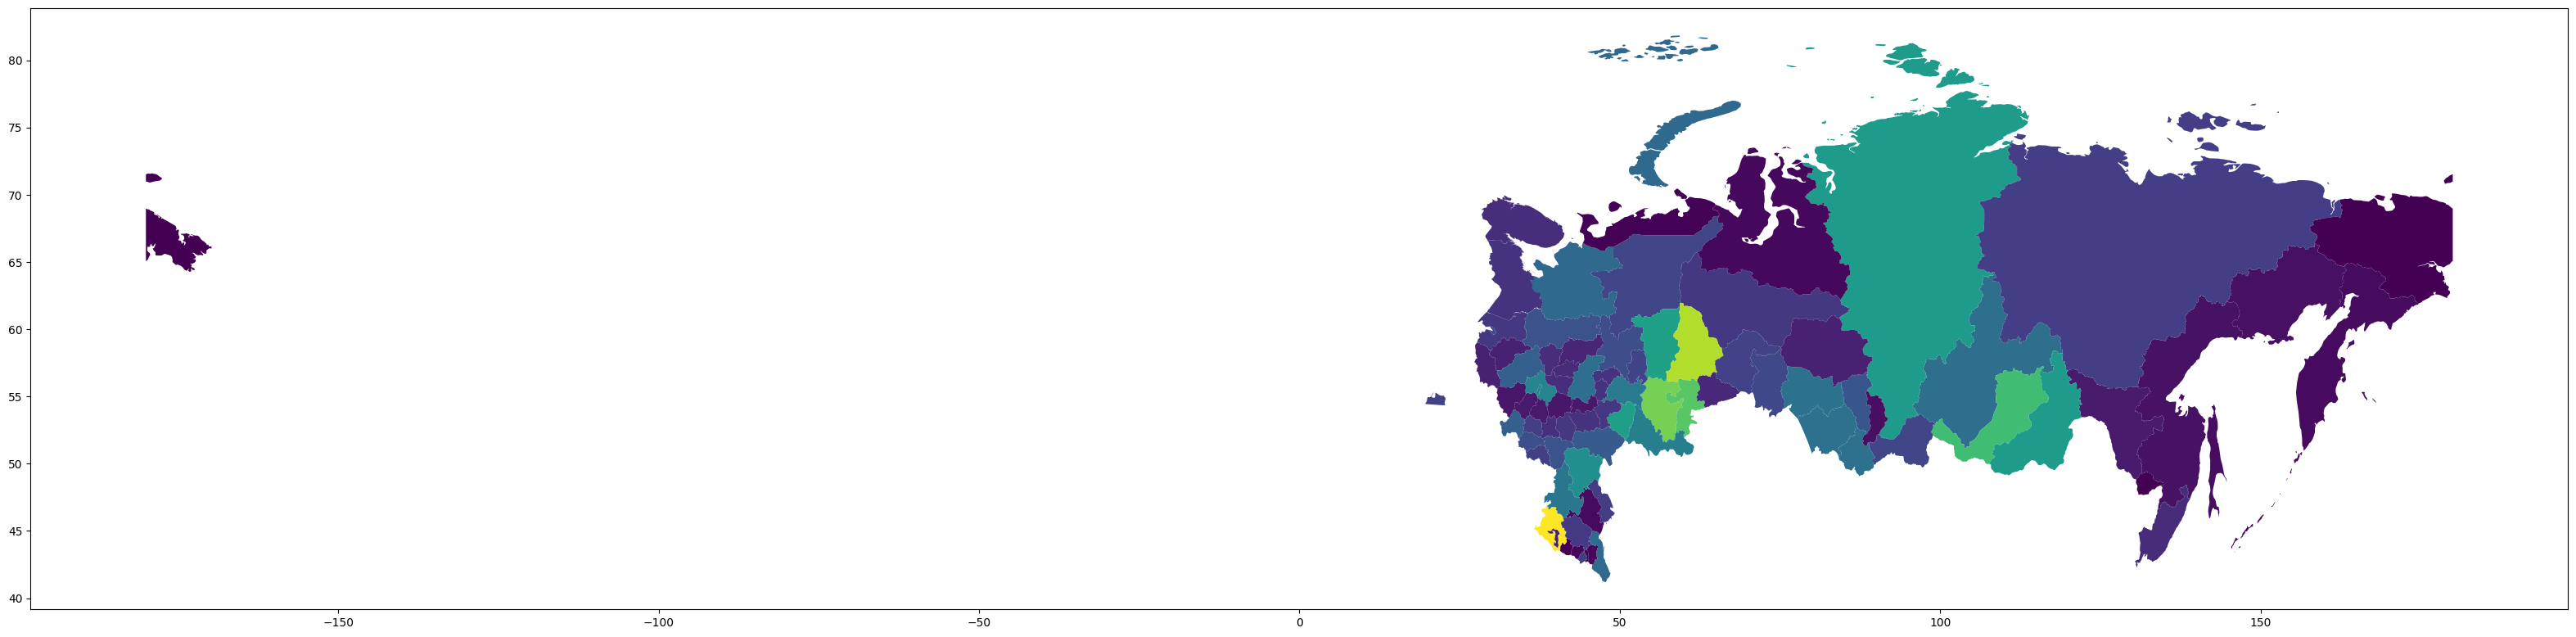

In [15]:
fatalities_per_region.set_geometry("geometry", crs = "EPSG:4326", inplace = True)
fatalities_per_region.plot(column="count", figsize=(40,10))
fatalities_per_region.sort_values(by="count" , ascending = False).head(15)

In [16]:
timestamp = calendar.timegm(time.gmtime())

fatalities_per_region_fn = f"../geolocated_datasets/{timestamp}-fatalities_per_region_Russia.json"
output_file = open(fatalities_per_region_fn, "w", encoding="utf-8-sig")
contents = fatalities_per_region.to_json()
output_file.write(contents)

2987825